In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pickle
import random

path = os.getcwd().split(os.sep + 'GUI')[0]
if path not in sys.path:
    print("not here")
    sys.path.append(path)

from neurolib.models.aln import ALNModel
from neurolib.utils import plotFunctions as plotFunc
from neurolib.utils import costFunctions as cost
import neurolib.dashboard.functions as functions
import neurolib.dashboard.data as data
    
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

#path = os.path.join(os.getcwd(), "plots")

not here


In [2]:
p0 = [0.86, 0.25] # high
p1 = [0.74, 0.37] # low

In [3]:
aln = ALNModel()

aln.params.sigma_ou = 0.
aln.params.mue_ext_mean = 0.
aln.params.mui_ext_mean = 0.
aln.params.ext_exc_current = 0.
aln.params.ext_inh_current = 0.

#aln.params.IA_init = np.zeros((1))

N = aln.params.N

state_vars = aln.state_vars
init_vars = aln.init_vars

##############################################################
def setinit(init_vars_, model):
    state_vars = model.state_vars
    init_vars = model.init_vars
    for iv in range(len(init_vars)):
        for sv in range(len(state_vars)):
            if state_vars[sv] in init_vars[iv]:
                #print("set init vars ", )
                if model.params[init_vars[iv]].ndim == 2:
                    model.params[init_vars[iv]][0,:] = init_vars_[sv]
                else:
                    model.params[init_vars[iv]][0] = init_vars_[sv]
                    
##############################################################               
def setmaxmincontrol(max_c_c, min_c_c, max_c_r, min_c_r):
    import numpy as np
    
    max_cntrl = np.zeros(( 6 ))
    min_cntrl = np.zeros(( 6 ))
    
    max_cntrl[0] = max_c_c
    min_cntrl[0] = min_c_c
    max_cntrl[1] = max_c_c
    min_cntrl[1] = min_c_c
    max_cntrl[2] = max_c_r
    min_cntrl[2] = min_c_r
    max_cntrl[3] = max_c_r
    min_cntrl[3] = min_c_r
    max_cntrl[4] = max_c_r
    min_cntrl[4] = min_c_r
    max_cntrl[5] = max_c_r
    min_cntrl[5] = min_c_r
            
    return max_cntrl, min_cntrl

In [23]:
dur = 500.
t_pen = 0.6

In [24]:
file_ = '3_E.pickle'
folder = str(os.getcwd().split('data_2')[1])
print(folder)
case = '3'

/adaptation_excursion


In [25]:
dur_pre = 10
dur_post = 100

n_pre = int(np.around(dur_pre/aln.params.dt + 1.,1))
n_post = int(np.around(dur_post/aln.params.dt + 1.,1))

tol = 1e-10
start_step = 10.
c_scheme = np.zeros(( 1,1 ))
c_scheme[0,0] = 1.
u_mat = np.identity(1)
u_scheme = np.array([[1.]])

p_var = [0]
c_var = [0]
#wp = 1. / (dur * t_pen[1] - t_pen[0] * dur)
wp = 1. / (dur - t_pen*dur)

if case in ['1', '2']:    # low to high
    max_I = [3., -3.]
else:
    max_I = [-3., 3.]
    
if case in ['1', '3']:    # sparsity
    factor_ws = 1.
    factor_we = 0.
else:
    factor_ws = 0.
    factor_we = 1.
    
maxC = [5., -5., 0.18, 0.]
max_cntrl, min_cntrl = setmaxmincontrol(maxC[0], maxC[1], maxC[2], maxC[3])

In [26]:
bestControl_ = None

if os.path.isfile(file_) :
    print("file found")
    
    with open(file_,'rb') as f:
        load_array = pickle.load(f)

    bestControl_ = load_array[0]

file found


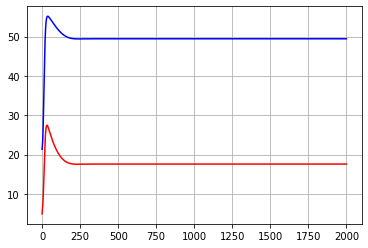

In [27]:
# get initial parameters and target states

aln.params.sigma_ou = 0.

aln.params.duration = 2000.

aln.params.mue_ext_mean = p0[0] * 5.
aln.params.mui_ext_mean = p0[1] * 5.

aln.run(control=aln.getZeroControl())
plt.plot(aln.t, aln.rates_exc[0,:], color='red')
plt.plot(aln.t, aln.rates_inh[0,:], color='blue')
plt.show()

init_state_vars = np.zeros(( len(state_vars) ))
for j in range(len(state_vars)):
    if aln.state[state_vars[j]].size == 1:
        init_state_vars[j] = aln.state[state_vars[j]][0]
    else:
        init_state_vars[j] = aln.state[state_vars[j]][0,-1]

initVars = init_state_vars.copy()

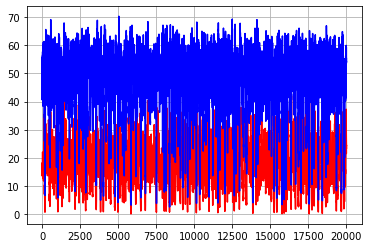

3.9096302173218036
18.406391521394816


In [28]:
aln.params.sigma_ou = 0.1

aln.params.duration = 20000.

aln.params.mue_ext_mean = p0[0] * 5.
aln.params.mui_ext_mean = p0[1] * 5.

setinit(initVars, aln)

aln.run(control=aln.getZeroControl())
plt.plot(aln.t, aln.rates_exc[0,:], color='red')
plt.plot(aln.t, aln.rates_inh[0,:], color='blue')
plt.show()

e_ = []
i_ = []
t_ind = []

for t in range(len(aln.t)):
    
    if aln.rates_exc[0,t] > 10:
        continue
    if aln.rates_inh[0,t] > 30:
        continue
    
    t_ind.append(t)
    e_.append(aln.rates_exc[0,t])
    i_.append(aln.rates_inh[0,t])
    
print(np.mean(e_))
print(np.mean(i_))

target = np.zeros((2))
target[0] = np.mean(e_)
target[1] = np.mean(i_)

set cost params:  0.005 0.0 0.0
interpolate adjoint :  True True True
initial cost =  93.37815264842904
RUN  0 , total integrated cost =  93.37815264842904
Gradient descend method:  None
RUN  0 , total integrated cost =  93.37815264842904
Improved over  0  iterations in  0.0  seconds by  0.0  percent.


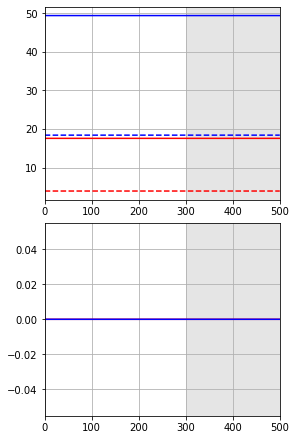

In [29]:
# get uncontrolled cost
    
aln.params.duration = dur
aln.params.sigma_ou = 0.

target_ = aln.getZeroTarget()
target_[:,0,:] = target[0]
target_[:,1,:] = target[1]

cost.setParams(wp, 0.0, 0.0)

aln.params.mue_ext_mean = p0[0] * 5.
aln.params.mui_ext_mean = p0[1] * 5.

setinit(initVars, aln)
control0 = aln.getZeroControl()

cgv = None
max_it = 0

bestControl_init_, bestState_init_, cost_init_, runtime_init_, grad_init_, phi_init_, phi1_, costnode_init_ = aln.A1(
    control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
    startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
    t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
    prec_variables_ = p_var, transition_time_ = t_pen)

if True:
    plot_time_array = np.arange(0.,round(dur+aln.params.dt,1),aln.params.dt)
    target_ = aln.getZeroTarget()
    target_[:,0,:] = target[0]
    target_[:,1,:] = target[1]

    fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,6) )
    ax[1].plot(plot_time_array, bestControl_init_[0,0,n_pre-1:-n_post+1], color = 'red')
    ax[0].plot(plot_time_array, bestState_init_[0,0,n_pre-1:-n_post+1], color= 'red')
    ax[1].plot(plot_time_array, bestControl_init_[0,1,n_pre-1:-n_post+1], color = 'blue')
    ax[0].plot(plot_time_array, bestState_init_[0,1,n_pre-1:-n_post+1], color= 'blue')
    ax[0].plot(plot_time_array, target_[0,0,n_pre-1:-n_post+1], linestyle = '--', color='red')
    ax[0].plot(plot_time_array, target_[0,1,n_pre-1:-n_post+1], linestyle = '--', color='blue')

    for k in range(2):
        ax[k].set_xlim(0.,dur)
        ax[k].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
    plt.show()

cost_uncontrolled = cost_init_[0]

set cost params:  0.005 0.0 10.0
interpolate adjoint :  True True True
initial cost =  93.37815264842904
RUN  0 , total integrated cost =  93.37815264842904
Gradient descend method:  None
RUN  1 , total integrated cost =  58.075365592084886
RUN  2 , total integrated cost =  36.37903667129436
RUN  3 , total integrated cost =  33.539288606081705
RUN  4 , total integrated cost =  32.30162048180016
RUN  5 , total integrated cost =  31.22796386032813
RUN  6 , total integrated cost =  31.13906008601156
RUN  7 , total integrated cost =  31.04781494118052
RUN  8 , total integrated cost =  30.987236550267646
RUN  9 , total integrated cost =  30.93318716774216


ERROR:root:Problem in initial value trasfer post


RUN  10 , total integrated cost =  30.887801242024548
RUN  10 , total integrated cost =  30.887801242024548
Improved over  10  iterations in  0.4701553210034035  seconds by  66.9218116165589  percent.
Problem in initial value trasfer post:  Vmean_exc -56.704232126382024 -56.70076698518659


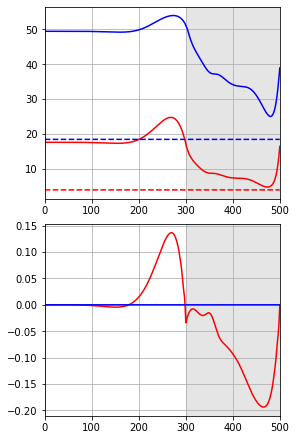

uncontrolled cost :  93.37815264842904
cost splitting :  2511.384123761279 [1.83308806 0.        ]


In [30]:
cgv = None
j = 0

aln.params.duration = dur
setinit(initVars, aln)

target_ = aln.getZeroTarget()
target_[:,0,:] = target[0]
target_[:,1,:] = target[1]

control0 = aln.getZeroControl()
cost.setParams(wp, 0., 10.)
max_it = int(10)

#control0[0,0,2400:2500] = 0.5

bestControl_, bestState_, cost_, runtime_, grad_, phi_, phi1_, costnode_ = aln.A1(
    control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
    startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
    t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
    prec_variables_ = p_var, transition_time_ = t_pen)

if True:
    plot_time_array = np.arange(0.,round(dur+aln.params.dt,1),aln.params.dt)
    target_ = aln.getZeroTarget()
    target_[:,0,:] = target[0]
    target_[:,1,:] = target[1]

    fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,6) )
    ax[1].plot(plot_time_array, bestControl_[0,0,n_pre-1:-n_post+1], color = 'red')
    ax[0].plot(plot_time_array, bestState_[0,0,n_pre-1:-n_post+1], color= 'red')
    ax[1].plot(plot_time_array, bestControl_[0,1,n_pre-1:-n_post+1], color = 'blue')
    ax[0].plot(plot_time_array, bestState_[0,1,n_pre-1:-n_post+1], color= 'blue')
    ax[0].plot(plot_time_array, target_[0,0,n_pre-1:-n_post+1], linestyle = '--', color='red')
    ax[0].plot(plot_time_array, target_[0,1,n_pre-1:-n_post+1], linestyle = '--', color='blue')

    for k in range(2):
        ax[k].set_xlim(0.,dur)
        ax[k].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
    plt.show()

print('uncontrolled cost : ', cost_uncontrolled)
print('cost splitting : ', costnode_[0][0][0], costnode_[2][0][:2])    

set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  14.390008681128185
RUN  0 , total integrated cost =  14.390008681128185
Gradient descend method:  None
RUN  1 , total integrated cost =  11.641516948490061
RUN  2 , total integrated cost =  11.184150428823376
RUN  3 , total integrated cost =  10.940598481367523
RUN  4 , total integrated cost =  10.882180450168356
RUN  5 , total integrated cost =  10.81156507835994
RUN  6 , total integrated cost =  10.745890998690347
RUN  7 , total integrated cost =  10.661926307477131
RUN  8 , total integrated cost =  10.591910209374888
RUN  9 , total integrated cost =  10.456279594571953
RUN  10 , total integrated cost =  10.358299833566866
RUN  11 , total integrated cost =  10.203524402331663
RUN  12 , total integrated cost =  10.07305667458052
RUN  13 , total integrated cost =  9.87028977040127
RUN  14 , total integrated cost =  9.710575876054858
RUN  15 , total integrated cost =  9.570059057324807
RUN  16 , total 

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  3.660636935638136
RUN  300 , total integrated cost =  3.660636935638136
Improved over  300  iterations in  44.45501195100951  seconds by  74.56125971321416  percent.
Problem in initial value trasfer post:  Vmean_exc -57.44073268931589 -57.42001604642919
cost splitting :  49.33461086367726 [2.57074364 0.84322024]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  3.660636935638136
RUN  0 , total integrated cost =  3.660636935638136
Gradient descend method:  None
RUN  1 , total integrated cost =  3.659092302041699
RUN  2 , total integrated cost =  3.6576031648954905
RUN  3 , total integrated cost =  3.655855905353892
RUN  4 , total integrated cost =  3.65416928681059
RUN  5 , total integrated cost =  3.6524497333799117
RUN  6 , total integrated cost =  3.6508771773794617
RUN  7 , total integrated cost =  3.649160514432206
RUN  8 , total integrated cost =  3.6475656164608314
RUN  9 , total integrated cost =  3.64618957

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  3.363362349654569
RUN  300 , total integrated cost =  3.363362349654569
Improved over  300  iterations in  45.76895779601182  seconds by  8.120843208717318  percent.
Problem in initial value trasfer post:  Vmean_exc -57.477711008210115 -57.4542755385025
cost splitting :  48.87177032681699 [2.98084763 0.13815586]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  3.363362349654569
RUN  0 , total integrated cost =  3.363362349654569
Gradient descend method:  None
RUN  1 , total integrated cost =  3.363061101047596
RUN  2 , total integrated cost =  3.3626193553620727
RUN  3 , total integrated cost =  3.362335681976767
RUN  4 , total integrated cost =  3.362069344511704
RUN  5 , total integrated cost =  3.3618263953123906
RUN  6 , total integrated cost =  3.3615793022529434
RUN  7 , total integrated cost =  3.3613330518691735
RUN  8 , total integrated cost =  3.361065666708668
RUN  9 , total integrated cost =  3.3606303

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  3.306001377227591
RUN  300 , total integrated cost =  3.306001377227591
Improved over  300  iterations in  48.25306433899095  seconds by  1.7054651406461971  percent.
Problem in initial value trasfer post:  Vmean_exc -57.554084178322135 -57.5310247339055
cost splitting :  37.192511280063044 [3.12003779e+00 1.03326443e-06]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  3.306001377227591
RUN  0 , total integrated cost =  3.306001377227591
Gradient descend method:  None
RUN  1 , total integrated cost =  3.30599222204455
RUN  2 , total integrated cost =  3.305983618459119
RUN  3 , total integrated cost =  3.305974536917842
RUN  4 , total integrated cost =  3.3059661428570406
RUN  5 , total integrated cost =  3.30595756232403
RUN  6 , total integrated cost =  3.305948996439585
RUN  7 , total integrated cost =  3.3059405076146597
RUN  8 , total integrated cost =  3.305932207410017
RUN  9 , total integrated cost =  3.3

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  3.304911705775221
RUN  300 , total integrated cost =  3.304911705775221
Improved over  300  iterations in  54.956401282019215  seconds by  0.032960405276170945  percent.
Problem in initial value trasfer post:  Vmean_exc -57.55888745118334 -57.53582783163317
cost splitting :  36.40685008827612 [3.12287642e+00 1.03326443e-06]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  3.304911705775221
RUN  0 , total integrated cost =  3.304911705775221
Gradient descend method:  None
RUN  1 , total integrated cost =  3.3049109312188873
RUN  2 , total integrated cost =  3.304910153389898
RUN  3 , total integrated cost =  3.3049093757089567
RUN  4 , total integrated cost =  3.3049085432533603
RUN  5 , total integrated cost =  3.30490783352678
RUN  6 , total integrated cost =  3.3049071208998444
RUN  7 , total integrated cost =  3.3049064428688655
RUN  8 , total integrated cost =  3.3049057175212178
RUN  9 , total integrated cost

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  3.3047765627653716
RUN  300 , total integrated cost =  3.3047765627653716
Improved over  300  iterations in  60.373784291004995  seconds by  0.004089156439889052  percent.
Problem in initial value trasfer post:  Vmean_exc -57.55923121355562 -57.5361521139512
cost splitting :  36.23593478015326 [3.12359586e+00 1.03326443e-06]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  3.3047765627653716
RUN  0 , total integrated cost =  3.3047765627653716
Gradient descend method:  None
RUN  1 , total integrated cost =  3.3047765536091385
RUN  2 , total integrated cost =  3.304776519612865
RUN  3 , total integrated cost =  3.3047764930227945
RUN  4 , total integrated cost =  3.3047762264511458
RUN  5 , total integrated cost =  3.3047760115017244
RUN  6 , total integrated cost =  3.304775997146165


ERROR:root:Problem in initial value trasfer post


RUN  7 , total integrated cost =  3.304775997146165
Control only changes marginally.
RUN  7 , total integrated cost =  3.304775997146165
Improved over  7  iterations in  1.3645127800118644  seconds by  1.7115202680884067e-05  percent.
Problem in initial value trasfer post:  Vmean_exc -57.55924132905678 -57.53616147068138
cost splitting :  36.23203962154477 [3.12361477e+00 1.03326443e-06]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  3.304775997146165
RUN  0 , total integrated cost =  3.304775997146165
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer post


RUN  1 , total integrated cost =  3.304775997146165
Control only changes marginally.
RUN  1 , total integrated cost =  3.304775997146165
Improved over  1  iterations in  0.20279489099630155  seconds by  0.0  percent.
Problem in initial value trasfer post:  Vmean_exc -57.55924132905678 -57.53616147068138
cost splitting :  36.23203962154477 [3.12361477e+00 1.03326443e-06]


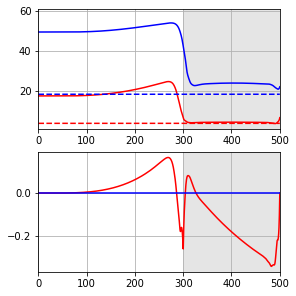

In [31]:
c_var = [0,1]
max_it = int(300)
conv = False

tol = 1e-6
    
while not conv:

    weight_ = 1.

    aln.params.duration = dur
    cost.setParams(wp, weight_ * factor_we, weight_ * factor_ws)
    weights_ = cost.getParams()

    setinit(initVars, aln)

    target_ = aln.getZeroTarget()
    target_[:,0,:] = target[0]
    target_[:,1,:] = target[1]

    control0 = aln.getZeroControl()
    control0 = bestControl_[:,:,n_pre-1:-n_post+1]

    bestControl_, bestState_, cost_, runtime_, grad_, phi_, phi1_, costnode_ = aln.A1(
        control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
        startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
        t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
        prec_variables_ = p_var, transition_time_ = t_pen)

    if cost_[2] == 0.:
        conv = True

    #print('uncontrolled cost : ', cost_uncontrolled[i])
    print('cost splitting : ', costnode_[0][0][0], costnode_[2][0][:2])

    if conv and True:
        time_ = np.arange(-dur_pre,round(dur+dur_post+aln.params.dt,1),aln.params.dt)
        target_ = aln.getZeroTarget()
        target_[:,0,:] = target[0]
        target_[:,1,:] = target[1]

        fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,4) )
        ax[1].plot(time_, bestControl_[0,0,:], color = 'red')
        ax[0].plot(time_, bestState_[0,0,:], color= 'red')
        ax[1].plot(time_, bestControl_[0,1,:], color = 'blue')
        ax[0].plot(time_, bestState_[0,1,:], color= 'blue')
        ax[0].plot(time_, target_[0,0,:], linestyle = '--', color='red')
        ax[0].plot(time_, target_[0,1,:], linestyle = '--', color='blue')
        for k in range(2):
            ax[k].set_xlim(0.,dur)
            ax[k].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
        plt.show()

    with open(file_,'wb') as f:
        pickle.dump([bestControl_, bestState_, cost_, costnode_, weights_], f)

set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  3.304775997146165
RUN  0 , total integrated cost =  3.304775997146165
Gradient descend method:  None
RUN  1 , total integrated cost =  3.3047754912884586
RUN  2 , total integrated cost =  3.304775337834545
RUN  3 , total integrated cost =  3.3047753326725706
RUN  4 , total integrated cost =  3.304775329830136
RUN  5 , total integrated cost =  3.3047753244764424
RUN  6 , total integrated cost =  3.304775320641779
RUN  7 , total integrated cost =  3.3047753043112014
RUN  8 , total integrated cost =  3.3047752929653145
RUN  9 , total integrated cost =  3.304775223999432
RUN  10 , total integrated cost =  3.304775202051199
RUN  11 , total integrated cost =  3.3047751912637917
RUN  12 , total integrated cost =  3.3047751809381523
RUN  13 , total integrated cost =  3.3047751753268817
RUN  14 , total integrated cost =  3.3047751622955444
RUN  15 , total integrated cost =  3.3047751589854126
RUN  16 , total i

ERROR:root:Problem in initial value trasfer post


RUN  40 , total integrated cost =  3.3047747552336886
Control only changes marginally.
RUN  41 , total integrated cost =  3.3047747552336886
Improved over  41  iterations in  5.845848703989759  seconds by  3.757932390158203e-05  percent.
Problem in initial value trasfer post:  Vmean_exc -57.55918996829182 -57.53610841064932
cost splitting :  36.2187412726487 [3.12368086e+00 1.87428367e-07]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  3.3047747552336886
RUN  0 , total integrated cost =  3.3047747552336886
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer post


RUN  1 , total integrated cost =  3.3047747552336886
Control only changes marginally.
RUN  1 , total integrated cost =  3.3047747552336886
Improved over  1  iterations in  0.19879718299489468  seconds by  0.0  percent.
Problem in initial value trasfer post:  Vmean_exc -57.55918996829182 -57.53610841064932
cost splitting :  36.2187412726487 [3.12368086e+00 1.87428367e-07]


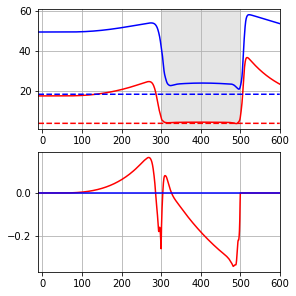

In [32]:
c_var = [0,1]
max_it = int(300)
conv = False

tol = 1e-8
    
while not conv:

    aln.params.duration = dur
    cost.setParams(wp, weight_ * factor_we, weight_ * factor_ws)
    weights_ = cost.getParams()

    setinit(initVars, aln)

    target_ = aln.getZeroTarget()
    target_[:,0,:] = target[0]
    target_[:,1,:] = target[1]

    control0 = aln.getZeroControl()
    control0 = bestControl_[:,:,n_pre-1:-n_post+1]

    bestControl_, bestState_, cost_, runtime_, grad_, phi_, phi1_, costnode_ = aln.A1(
        control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
        startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
        t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
        prec_variables_ = p_var, transition_time_ = t_pen)

    if cost_[3] == 0.:
        conv = True

    #print('uncontrolled cost : ', cost_uncontrolled[i])
    print('cost splitting : ', costnode_[0][0][0], costnode_[2][0][:2])

    if conv and True:
        time_ = np.arange(-dur_pre,round(dur+dur_post+aln.params.dt,1),aln.params.dt)
        target_ = aln.getZeroTarget()
        target_[:,0,:] = target[0]
        target_[:,1,:] = target[1]

        fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,4) )
        ax[1].plot(time_, bestControl_[0,0,:], color = 'red')
        ax[0].plot(time_, bestState_[0,0,:], color= 'red')
        ax[1].plot(time_, bestControl_[0,1,:], color = 'blue')
        ax[0].plot(time_, bestState_[0,1,:], color= 'blue')
        ax[0].plot(time_, target_[0,0,:], linestyle = '--', color='red')
        ax[0].plot(time_, target_[0,1,:], linestyle = '--', color='blue')
        ax[0].set_xlim(-dur_pre,dur+dur_post)
        ax[1].set_xlim(-dur_pre,dur+dur_post)
        ax[0].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
        plt.show()

    with open(file_,'wb') as f:
        pickle.dump([bestControl_, bestState_, cost_, costnode_, weights_], f)

set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  3.3047747552336886
RUN  0 , total integrated cost =  3.3047747552336886
Gradient descend method:  None
RUN  1 , total integrated cost =  3.3047747175037836
RUN  2 , total integrated cost =  3.304774694267117
RUN  3 , total integrated cost =  3.3047746863352327
RUN  4 , total integrated cost =  3.304774681770528
RUN  5 , total integrated cost =  3.304774679604951
RUN  6 , total integrated cost =  3.3047746783996725
RUN  7 , total integrated cost =  3.30477467777206


ERROR:root:Problem in initial value trasfer post


RUN  8 , total integrated cost =  3.3047746777720137
RUN  9 , total integrated cost =  3.3047746777720137
Control only changes marginally.
RUN  9 , total integrated cost =  3.3047746777720137
Improved over  9  iterations in  0.8901047490071505  seconds by  2.3439320528950702e-06  percent.
Problem in initial value trasfer post:  Vmean_exc -57.559189704924506 -57.53610814301935
cost splitting :  36.21876213347251 [3.12368087e+00 2.02367624e-09]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  3.3047746777720137
RUN  0 , total integrated cost =  3.3047746777720137
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer post


RUN  1 , total integrated cost =  3.3047746777720137
Control only changes marginally.
RUN  1 , total integrated cost =  3.3047746777720137
Improved over  1  iterations in  0.14200723599060439  seconds by  0.0  percent.
Problem in initial value trasfer post:  Vmean_exc -57.559189704924506 -57.53610814301935
cost splitting :  36.21876213347251 [3.12368087e+00 2.02367624e-09]


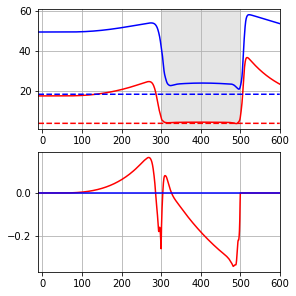

In [33]:
c_var = [0,1]
max_it = int(300)
conv = False

tol = 1e-10
    
while not conv:

    aln.params.duration = dur
    cost.setParams(wp, weight_ * factor_we, weight_ * factor_ws)
    weights_ = cost.getParams()

    setinit(initVars, aln)

    target_ = aln.getZeroTarget()
    target_[:,0,:] = target[0]
    target_[:,1,:] = target[1]

    control0 = aln.getZeroControl()
    control0 = bestControl_[:,:,n_pre-1:-n_post+1]

    bestControl_, bestState_, cost_, runtime_, grad_, phi_, phi1_, costnode_ = aln.A1(
        control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
        startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
        t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
        prec_variables_ = p_var, transition_time_ = t_pen)

    if cost_[3] == 0.:
        conv = True

    #print('uncontrolled cost : ', cost_uncontrolled[i])
    print('cost splitting : ', costnode_[0][0][0], costnode_[2][0][:2])

    if conv and True:
        time_ = np.arange(-dur_pre,round(dur+dur_post+aln.params.dt,1),aln.params.dt)
        target_ = aln.getZeroTarget()
        target_[:,0,:] = target[0]
        target_[:,1,:] = target[1]

        fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,4) )
        ax[1].plot(time_, bestControl_[0,0,:], color = 'red')
        ax[0].plot(time_, bestState_[0,0,:], color= 'red')
        ax[1].plot(time_, bestControl_[0,1,:], color = 'blue')
        ax[0].plot(time_, bestState_[0,1,:], color= 'blue')
        ax[0].plot(time_, target_[0,0,:], linestyle = '--', color='red')
        ax[0].plot(time_, target_[0,1,:], linestyle = '--', color='blue')
        ax[0].set_xlim(-dur_pre,dur+dur_post)
        ax[1].set_xlim(-dur_pre,dur+dur_post)
        ax[0].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
        plt.show()

    with open(file_,'wb') as f:
        pickle.dump([bestControl_, bestState_, cost_, costnode_, weights_], f)